# Logistics Map

Population is modeled in terms of a recursion parameter $r$ and a sigmoid curve $x(1-x)$
with $x \in [0, 1]$. The balancing ideas are: Population increases in relation to how many
creatures there are ('$x$'); but population eventually reaches a plateau owing to the finite
constraints of the ecosystem. For more on this see **Nonlinear Dynamics and Chaos** by Steven Strogatz.
In a discrete timestep view we have


$\begin{align}
x_{t+1} = r x_t (1 - x_t)
\end{align}$


In practice we begin with a non-zero seed value for $x_0$ and recurse the function through a
number of timesteps to see what becomes of the population as influenced by $r$. This can be
visualized with a cobweb diagram that captures the influence of $r$ and the quadratic nature
of the function. Once this is in place we can explore the continuum of $r$ values to create 
a different visualization called a logistics map.


Left off here March 2025.


There are three interesting results, just to begin with. First for particular ranges of r the recursion
settles down to one... or two... or four... or eight... stable terms. i.e. further iterations cycle 
between stable values. Second: Beyond this, for larger r, there is no stability; just chaos. And 
third, other functions can be substituted for x in the expression r x (1 - x).


There is more to observe as well. Just to begin with:
The alignment of orbital (stable multi-value) regions; the voids that
appear in the chaotic regions; associated orbitals *there*; dense arcuate paths through the chaos; precise
locations of bifurcation points; slow convergence 'after' bifurcation points (leaving dust); various
artifacts for example created by using a constant seed value; other pathological/dusty artifacts 
outside the orderly part of the chart; and of course (Izzie remarks) the asymmetry of the 
bifurcation structure.


As an idea for subsequent work: One could create an animation through a gradation of polynomial coefficients
showing how they impact the Logistics Map structure.


Also available: Information could be encoded as a corresponding list of colors.


Also: Use axis range parameters to zoom in on particular regions. Perhaps return `fig, ax` to this end.




In [6]:
# Logistics Map charting function defined
import numpy as np
from matplotlib import pyplot as plt
from random import randint, random
from math import sin, cos, log
from numpy import arctanh

def LM(p, f):
    '''
    p[] is a list of control parameters as follows: 
      r0, r1, dr define the range and increment of the recursion parameter r
      lo/hiLim define a 'fall out of recursion' condition: x has 'escaped'
      aRan, bRan define the seed range: aRan + bRan * random(0 -- 1)
      aIts, bIts define a base plus smaller random number of iterations
        When the recursion reaches a cycling point: Choose a random one of 
        these to plot so they are eventually all shown on the chart.
      s and c are the respective size and color of the markers
      wid and hgt are the dimensions of the chart
    f is a function to use as the recursion basis.
        This is coordinated with choice of r0, r1, dr to focus on an ROI.
        The function can be an existing one like sine or it can be defined
          in the cell.
    '''
    r0, r1, dr, loLim, hiLim, aRan, bRan = p[0], p[1], p[2], p[3], p[4], p[5], p[6]
    aIts, bIts, s, c, wid, hgt           = p[7], p[8], p[9], p[10], p[11], p[12]
    rd, xd = [], []
    for r in np.arange(r0, r1, dr):
        n, x0 = aIts + randint(1, bIts), aRan + bRan * random()
        for i in range(n):
            xp = r * f(x0) * (1 - f(x0))
            if xp < loLim or xp > hiLim: break
            x0 = xp
        rd.append(r); xd.append(x0)
    fig, ax = plt.subplots(figsize=(wid, hgt)); ax.scatter(rd, xd, s=s, c=c)

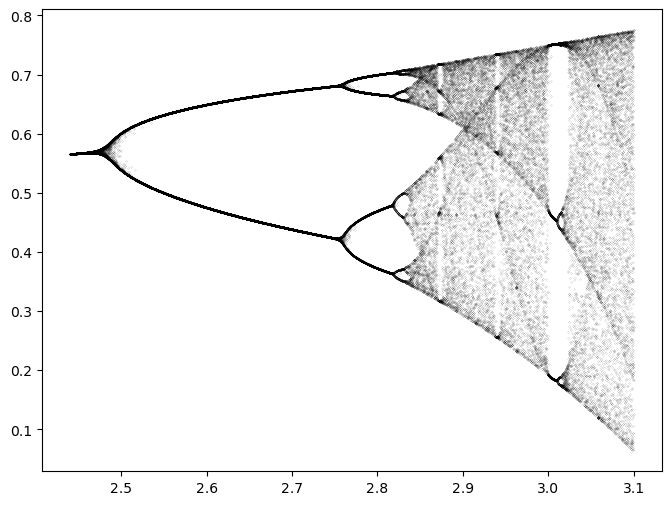

In [7]:
from math import tan
LM([2.44, 3.1, .00001, 0, .8, 0.10, 0.62, 100, 16, .005, 'k', 8, 6], tan)

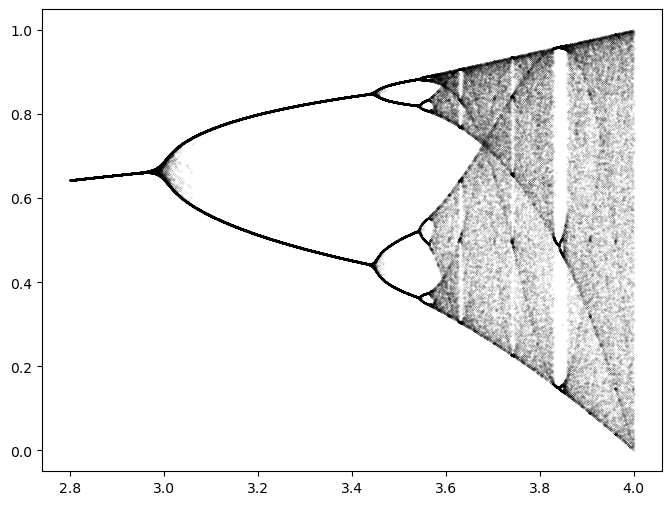

In [8]:
def X(x): return x
LM([2.8, 4.0, .00001, 0, 4, 0.1, 0.8, 100, 16, .005, 'k', 8, 6], X)

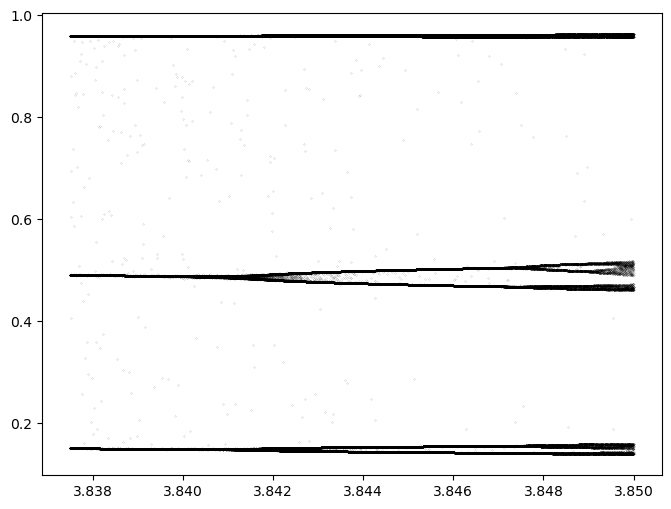

In [9]:
def X(x): return x
LM([3.8375, 3.85, .0000001, -10, 10, 0.1, 0.8, 100, 16, .005, 'k', 8, 6], X)

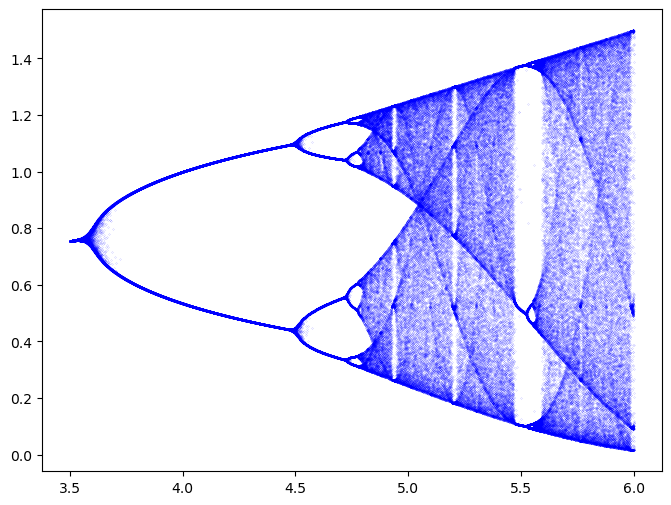

In [10]:
# sine
LM([3.5, 6., .00001, 0, 4, 0.1, 0.8, 100, 16, .005, 'b', 8, 6], sin)

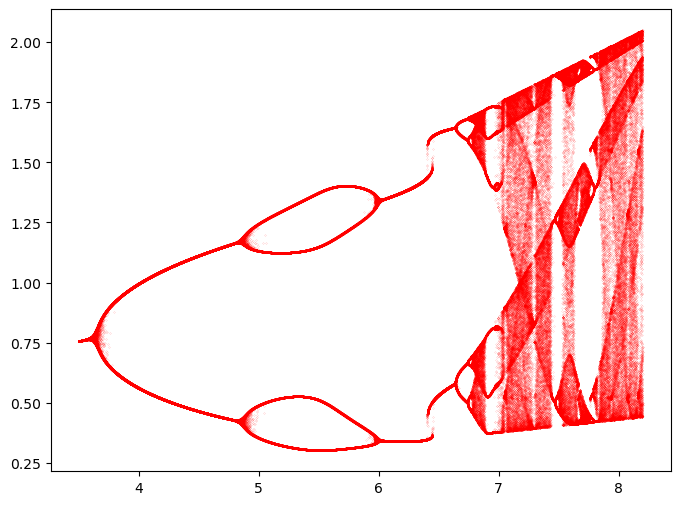

In [11]:
# sine: polynomial, 2 terms
def sinePoly2(x): return x - x**3/6
LM([3.5, 8.2, .00001, 0, 4, 0.1, 0.8, 100, 16, .005, 'red', 8, 6], sinePoly2)

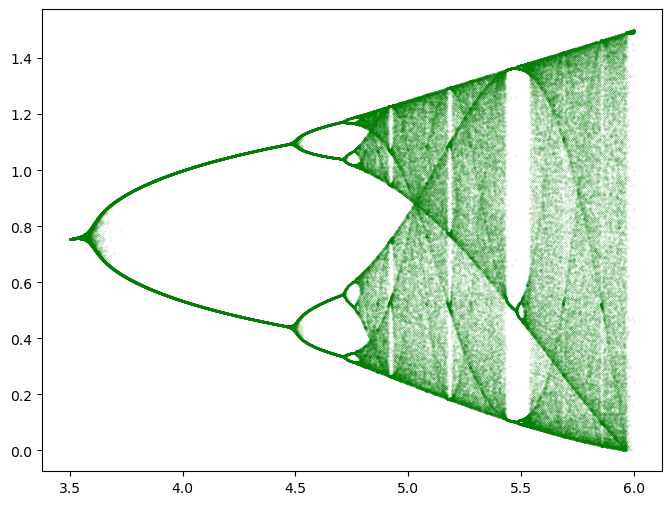

In [12]:
# sine: polynomial, 3 terms
def sinePoly3(x): return x - x**3/6 + x**5/120

LM([3.5, 6., .00001, 0, 4, 0.1, 0.8, 100, 16, .005, 'green', 8, 6], sinePoly3)

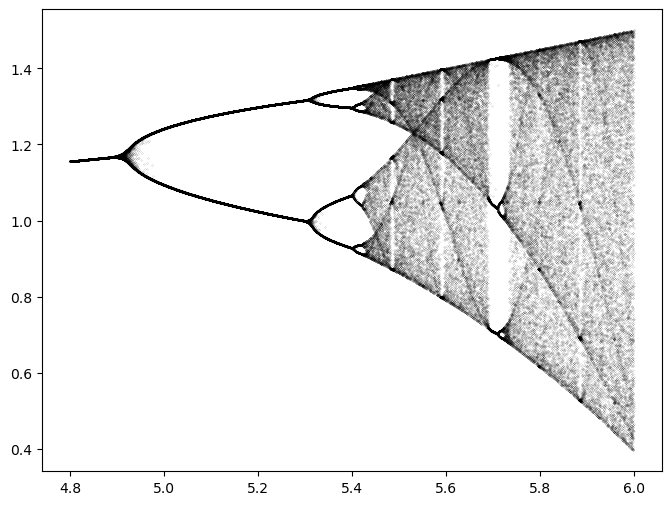

In [14]:
# cosine
LM([4.8, 6.0, .00001, 0, 4, 0.5, 0.5, 100, 16, .005, 'k', 8, 6], cos)

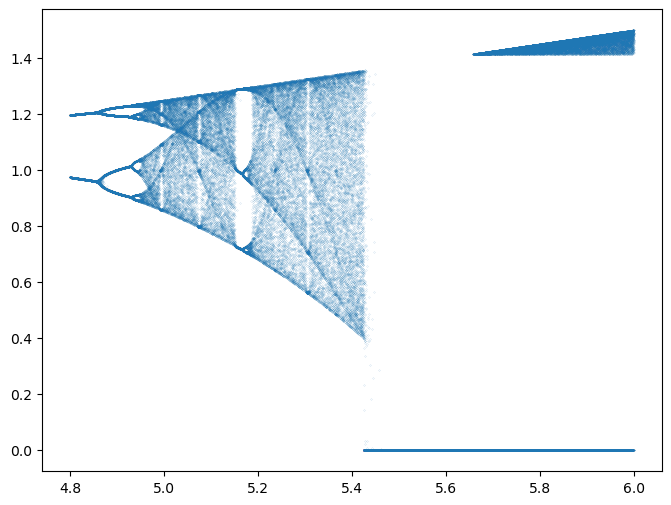

In [15]:
# cosine polynomial 2 terms
def cosPoly2(x): return 1 - x**2/2
LM([4.8, 6.0, .00001, 0, 4, 0.5, 0.5, 100, 16, .005, '#1f77b4', 8, 6], cosPoly2)

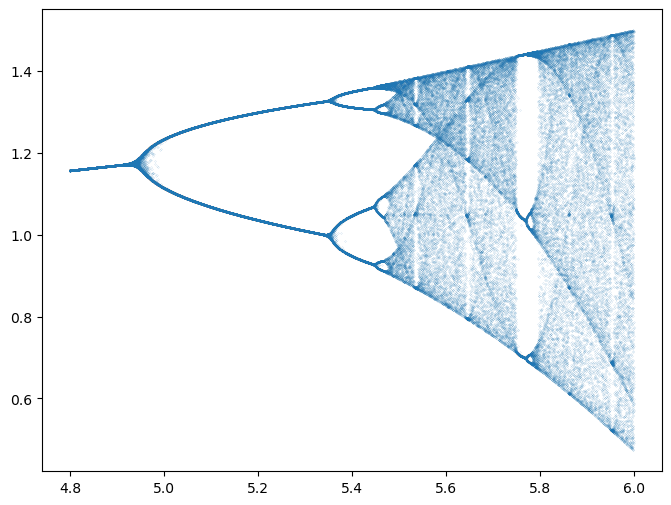

In [16]:
# cosine polynomial 3 terms
def cosPoly3(x): return 1 - x**2/2 + x**4/24
LM([4.8, 6.0, .00001, 0, 4, 0.5, 0.5, 100, 16, .005, '#1f77b4', 8, 6], cosPoly3)

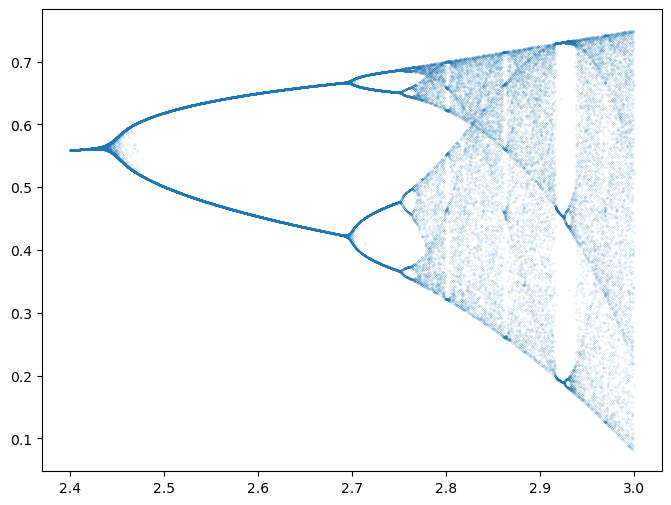

In [17]:
# hyperbolic arctan
LM([2.4, 3.0, .00001, 0, 4, 0.1, 0.5, 100, 16, .005, '#1f77b4', 8, 6], arctanh)

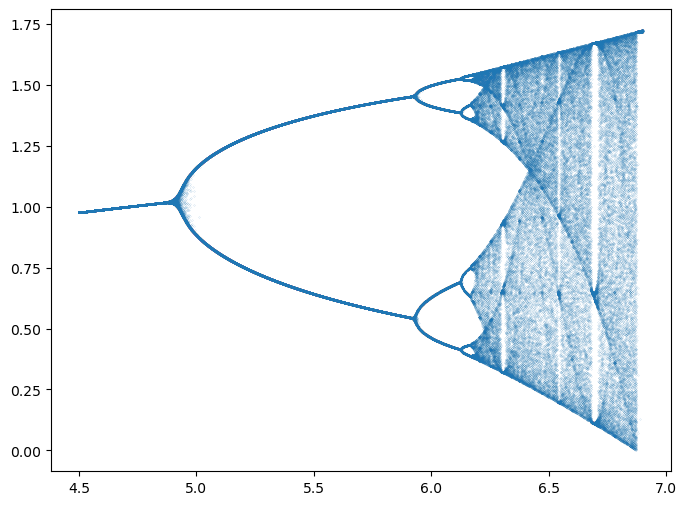

In [18]:
# logarithm(1 + x)
def logOnePlusX(x): return log(1 + x)
LM([4.5, 6.9, .00001, 0, 4, 0.1, 0.5, 200, 16, .005, '#1f77b4', 8, 6], logOnePlusX)

## Mandelbrot on the real line

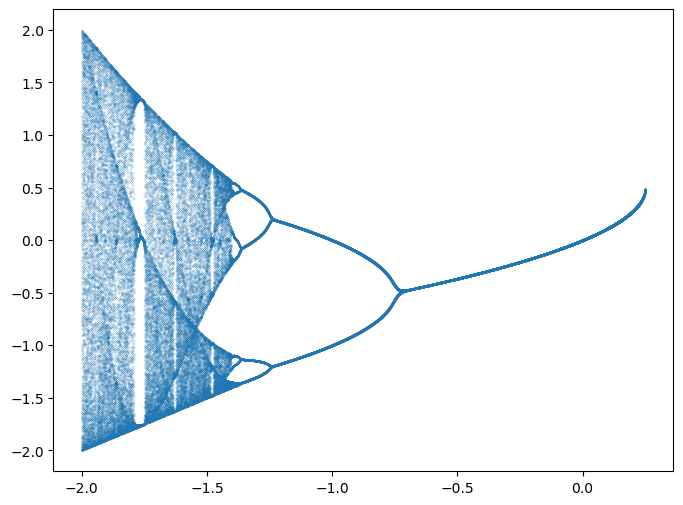

In [19]:
# The Mandelbrot set behaves similarly to the Logistics Map in terms of stable 'orbital' cycling
# Here we isolate from the complex plane only the real line
# The r parameter (multiplier) is replaced by lambda. It is an interesting combination by analogy
#   of multiplier and seed point.

import numpy as np
from matplotlib import pyplot as plt
from random import randint

lamd, xd = [], []
for lam in np.arange(.25, -2., -.00001):
    n = 100 + randint(0, 10)
    x0 = 0.0
    for i in range(n):
        xp = x0**2 + lam
        if abs(xp) > 6: break
        x0 = xp
    lamd.append(lam); xd.append(x0)
    
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(lamd, xd, s=.01, c='#1f77b4')

## Mandelbrot set visuals

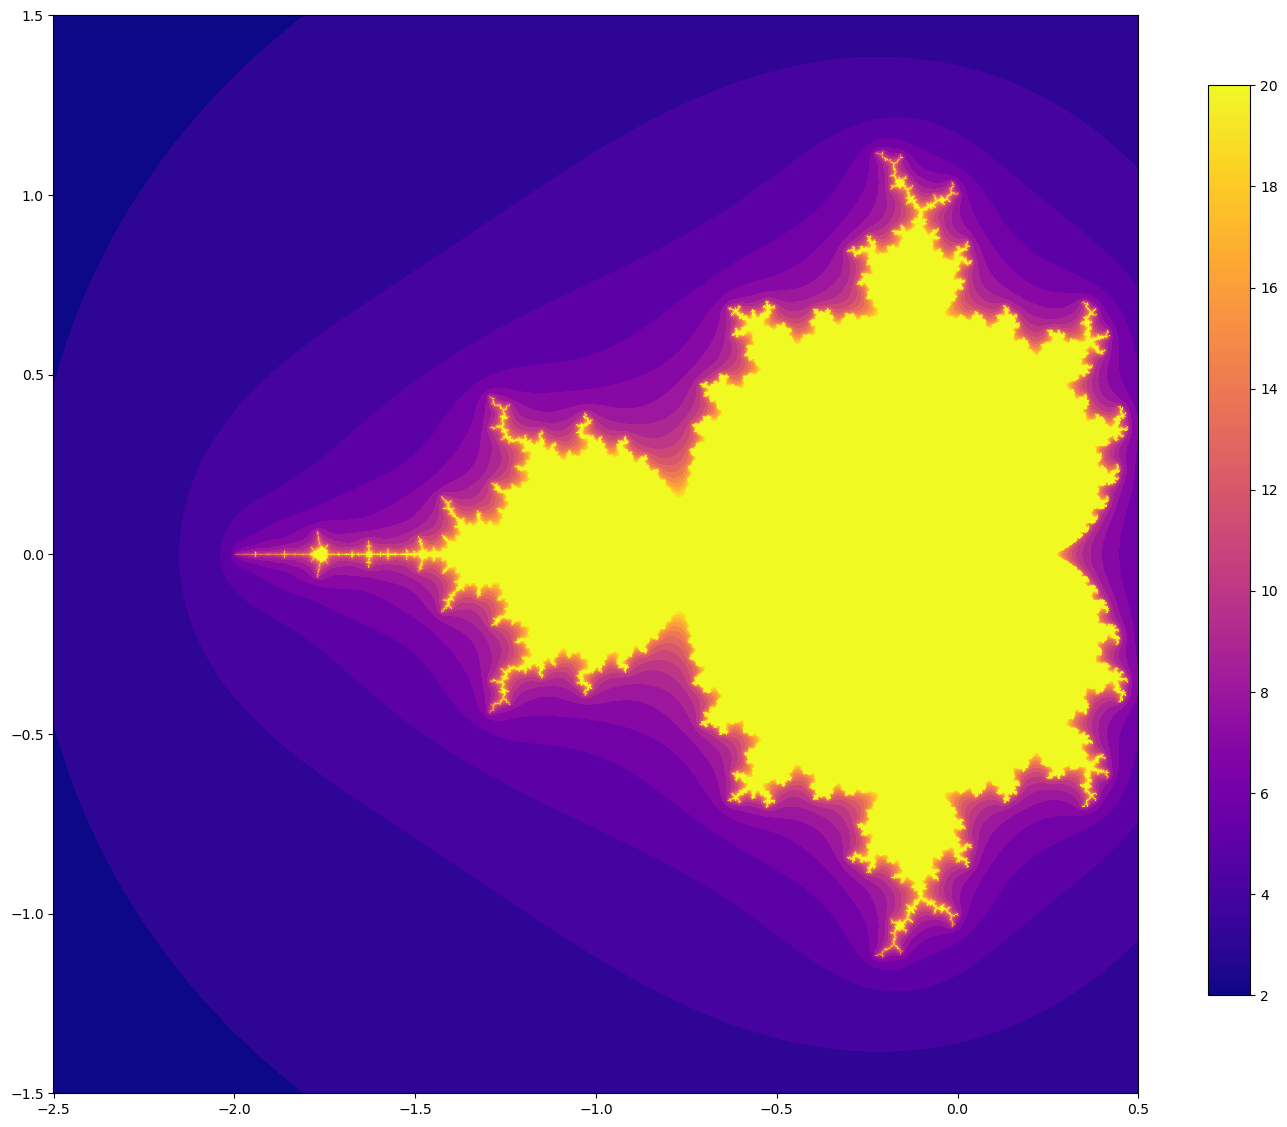

In [20]:
# mandelbrot
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

def z(x, y):
    lambda_x, lambda_y = x, y
    xs, ys, i = 0., 0., 0
    while i < 20:
        i += 1
        if i == 20: break
        xp, yp = xs**2 - ys**2 + lambda_x, 2*xs*ys + lambda_y
        if sqrt(xp**2 + yp**2) > 4: break
        xs, ys = xp, yp
    return i

z2 = np.vectorize(z)

epsilon = .0005
x = np.arange(-2.5, 0.5 + epsilon, epsilon)
y = np.arange(-1.5, 1.5 + epsilon, epsilon)
X, Y = np.meshgrid(x, y)
Z = z2(X, Y)
fig, ax = plt.subplots(figsize=(14,14))

my_cmap = 'plasma'
im=ax.pcolormesh(x, y, Z, cmap=my_cmap)
cax = fig.add_axes([.95, 0.18, .03, .65])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

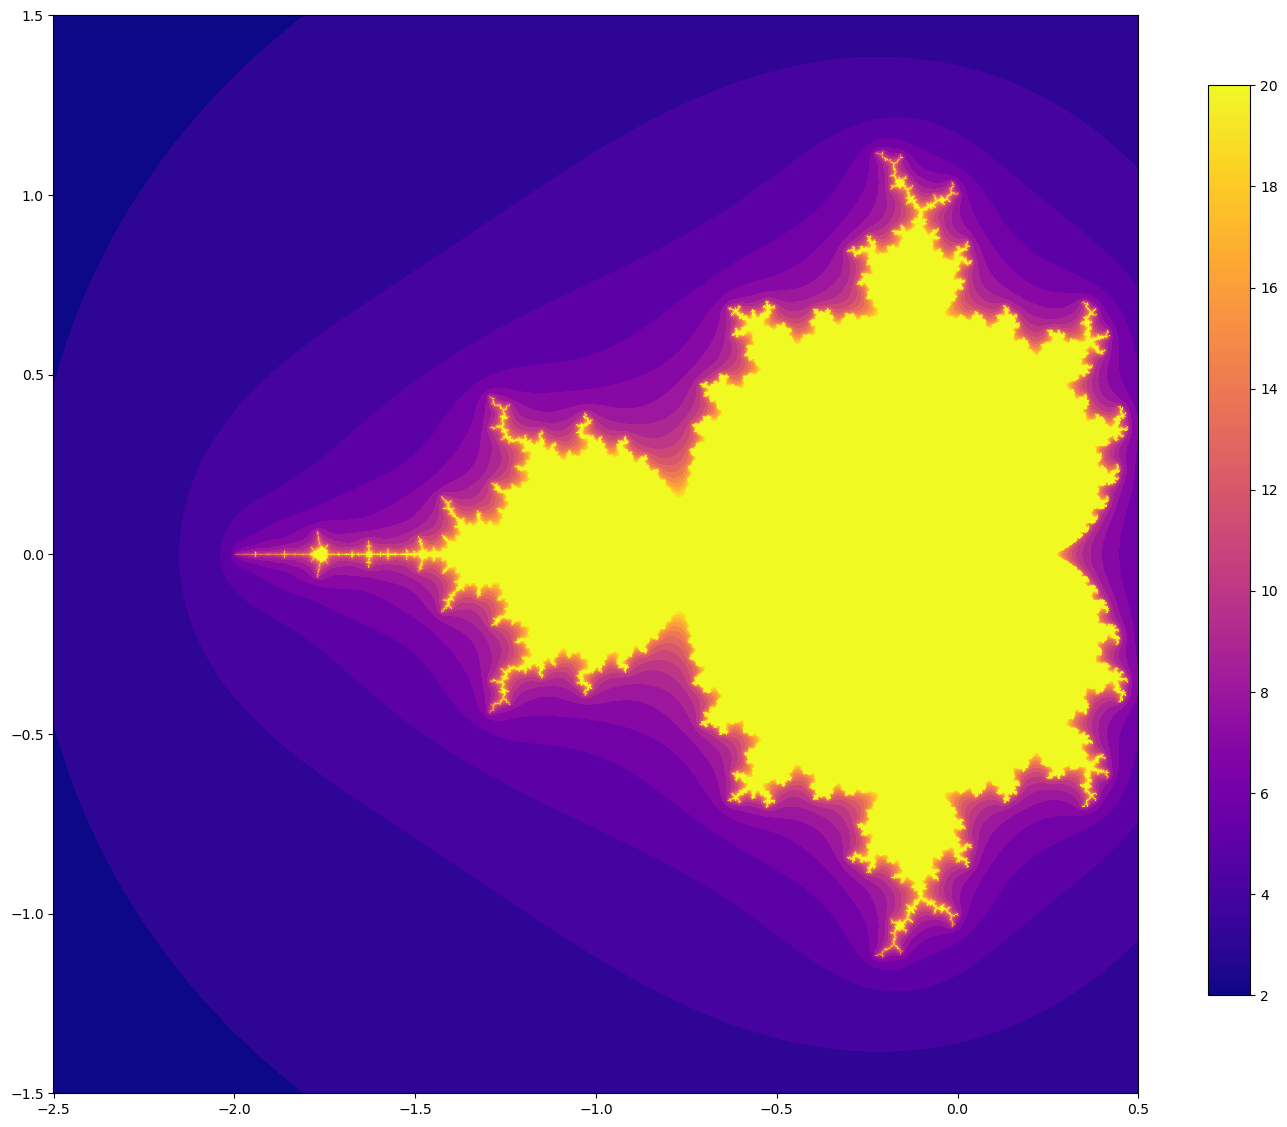

In [21]:
# mandelbrot
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

def z(x, y):
    lambda_x, lambda_y = x, y
    xs, ys, i = 0., 0., 0
    while i < 20:
        i += 1
        if i == 20: break
        xp, yp = xs**2 - ys**2 + lambda_x, 2*xs*ys + lambda_y
        if sqrt(xp**2 + yp**2) > 4: break
        xs, ys = xp, yp
    return i

z2 = np.vectorize(z)

epsilon = .0005
x = np.arange(-2.5, 0.5 + epsilon, epsilon)
y = np.arange(-1.5, 1.5 + epsilon, epsilon)
X, Y = np.meshgrid(x, y)
Z = z2(X, Y)
fig, ax = plt.subplots(figsize=(14,14))

my_cmap = 'plasma'
im=ax.pcolormesh(x, y, Z, cmap=my_cmap)
cax = fig.add_axes([.95, 0.18, .03, .65])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

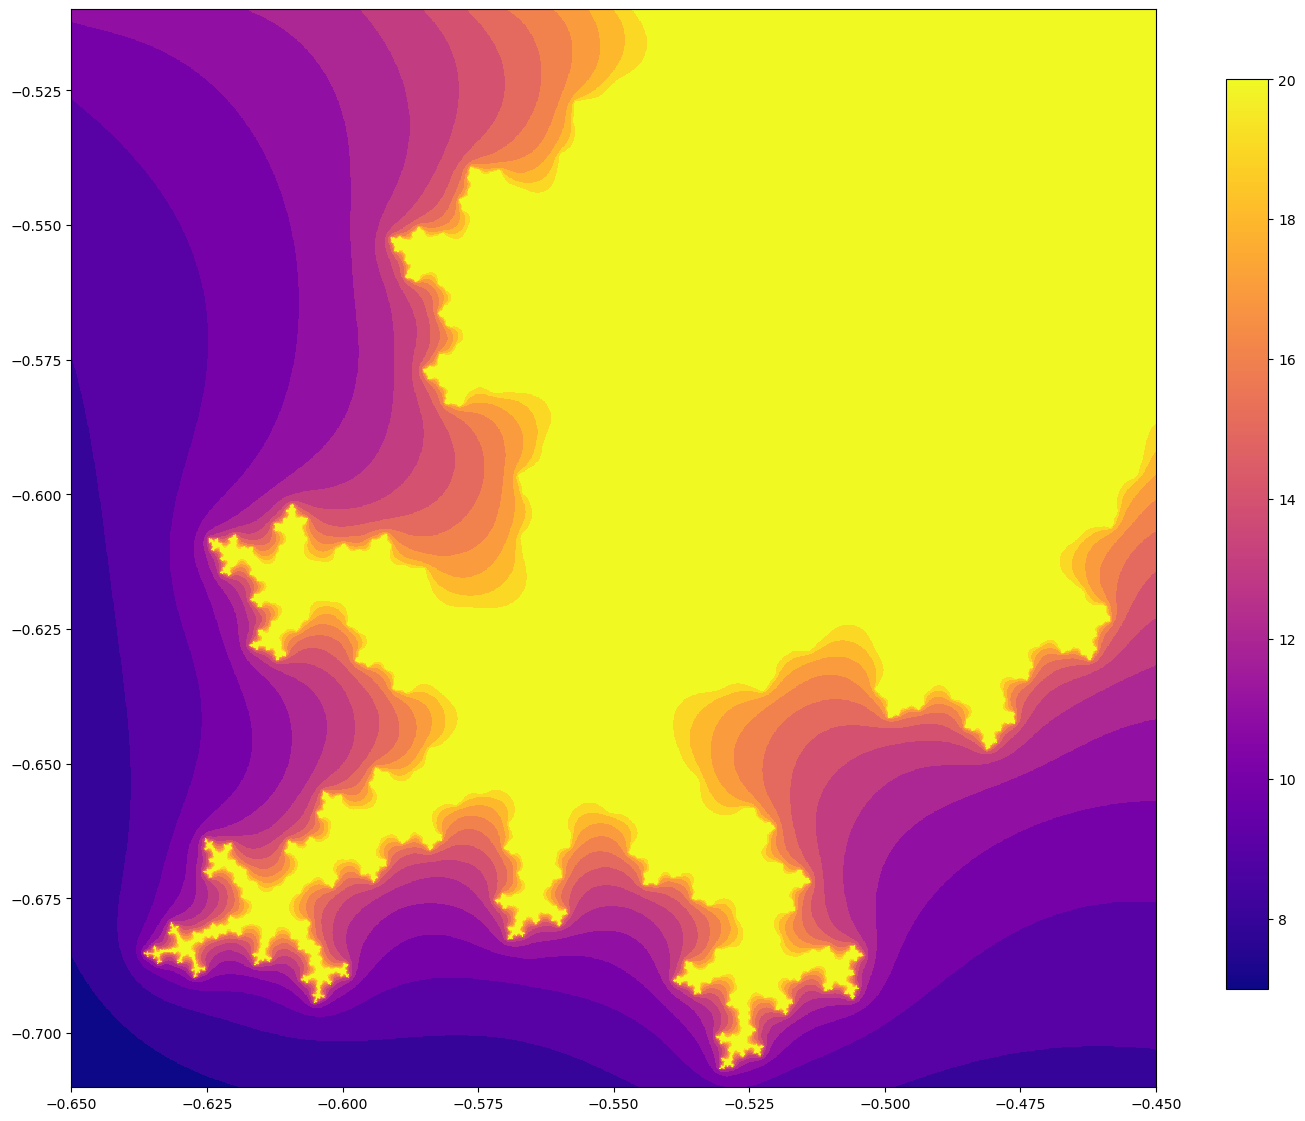

In [22]:
# mandelbrot
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

box_x = -2.1
box_y = -1.5
box_w = 3

box_x = -0.65
box_y = -0.71
box_w = .2

def z(x, y):
    lambda_x, lambda_y = x, y
    xs, ys, i = 0., 0., 0
    while i < 20:
        i += 1
        if i == 20: break
        xp, yp = xs**2 - ys**2 + lambda_x, 2*xs*ys + lambda_y
        if sqrt(xp**2 + yp**2) > 4: break
        xs, ys = xp, yp
    return i

z2 = np.vectorize(z)

# Set up the bounding box and increment
epsilon = box_w / 2000
x = np.arange(box_x, box_x + box_w + epsilon, epsilon)
y = np.arange(box_y, box_y + box_w + epsilon, epsilon)

X, Y = np.meshgrid(x, y)
Z = z2(X, Y)
fig, ax = plt.subplots(figsize=(14,14))

my_cmap = 'plasma'
im=ax.pcolormesh(x, y, Z, cmap=my_cmap)
cax = fig.add_axes([.95, 0.18, .03, .65])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

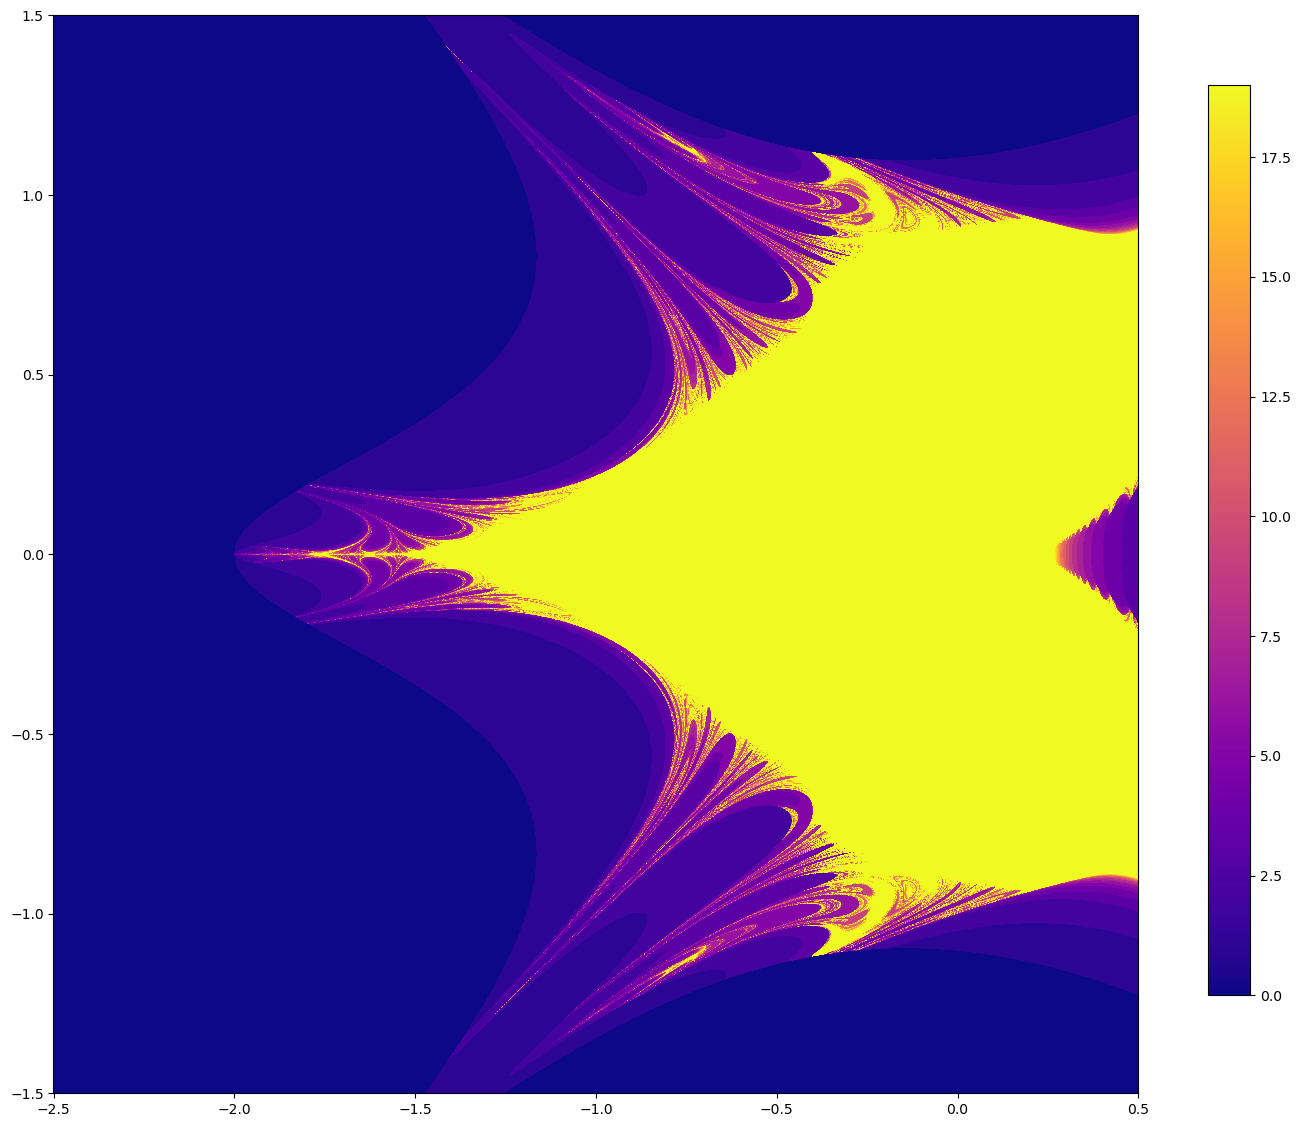

In [13]:
# more ship-like... I wonder what happened here...

import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

def z(x, y):
    '''This function calculates a scalar value from a complex number (x, y)'''
    lambda_x, lambda_y = x, y                  # don't use this lambda; but it is important for the Mandelbrot set
    xp, yp = lambda_x, lambda_y
    dist = sqrt(lambda_x**2 + lambda_y**2)
    for i in range(20):
        #xpc= xp left out this line
        xp = (xp**2 - yp**2)
        #yp = 2 * xpc * yp and did the below instead of this
        yp = 2 * xp * yp
        xp += lambda_x
        yp += lambda_y
        dist = sqrt(xp**2 + yp**2)
        if (dist > 2): break
    return i


z2 = np.vectorize(z)

epsilon = .0005
x = np.arange(-2.5, 0.5 + epsilon, epsilon)
y = np.arange(-1.5, 1.5 + epsilon, epsilon)
X, Y = np.meshgrid(x, y)
Z = z2(X, Y)
fig, ax = plt.subplots(figsize=(14,14))

my_cmap = 'plasma'
im=ax.pcolormesh(x, y, Z, cmap=my_cmap)
cax = fig.add_axes([.95, 0.18, .03, .65])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()